In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [90]:
#df2 = pd.read_csv("../../data/Business_Combinations_10_21_2021.csv")

C:\Users\laure\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (78,114,138) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [104]:
#df2.iloc[1908]

ACQ_BRANCHES                                                                   4
ACQ_BRANCHES_HREF              /api/history?filters=TRANSNUM:200412211 AND RE...
ACQ_CERT                                                                   28153
ACQ_CHARTAGENT                                                               OTS
ACQ_CHARTER                                                                    0
                                                     ...                        
UNASSIST_OTS_TO_COM_FLAG                                                       0
UNASSIST_OTS_TO_OTS_FLAG                                                       0
UNINUM                                                                         1
VOLUNTARY_LIQUIDATION_FLAG                                                 42523
WITHDRAW_INSURANCE_COM_FLAG                                                    0
Name: 1908, Length: 147, dtype: object

In [88]:
df = pd.read_csv("../../data/New_Institutions_10_21_2021.csv")

In [3]:
df.head()

,ACQDATE,ACQYEAR,ASSISTED_PAYOUT_FLAG,BANK_INSURED,CERT,CHANGECODE,CHANGECODE_DESC,CHANGECODE_DESC_LONG,CHARTAGENT,CHARTER_COM_TO_OTHER_FLAG,...,FRM_CERT,FRM_CHARTAGENT,FRM_CNTYNAME,FRM_INSTNAME,FRM_ORGTYPE,FRM_PADDR,FRM_PCITY,FRM_PZIP5,FRM_PZIPREST,FRM_TRUST
0,1986-09-16T00:00:00,1986,0,N,45583,110,NEW INSTITUTION,Institution established but was not FDIC insur...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-03-29T00:00:00,2006,0,Y,34619,110,NEW INSTITUTION,Institution established. Original name: ITS Ba...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-03-29T00:00:00,2006,0,Y,35045,110,NEW INSTITUTION,Institution established. Original name: Bristo...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-05-04T00:00:00,2000,0,Y,35417,110,NEW INSTITUTION,Institution established. Original name: TriSta...,STATE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-12-31T00:00:00,2002,0,Y,35347,110,NEW INSTITUTION,Institution established. Original name: Nation...,OCC,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:

x = df[['EFFYEAR', "CLASS_TYPE", 'CERT']]
x = x[x['EFFYEAR']>1999]
comb_new_by_year = x.groupby(['CLASS_TYPE', 'EFFYEAR']).count()['CERT'].reset_index()

comb_new_by_year.columns = ['Class Type', 'Effective Year', 'Count']

In [82]:
for year in range(2000, 2022):
    temp_com = comb_new_by_year.loc[(comb_new_by_year['Effective Year'] == year) &
                                         (comb_new_by_year['Class Type'] == 'C')]
    temp_sav = comb_new_by_year.loc[(comb_new_by_year['Effective Year'] == year) &
                                         (comb_new_by_year['Class Type'] == 'S')]
    if len(temp_com) != 1:
        comb_new_by_year = comb_new_by_year.append({'Class Type': 'C', 'Effective Year': year, 'Count': 0}, ignore_index=True)
    if len(temp_sav) != 1:
        comb_new_by_year = comb_new_by_year.append({'Class Type': 'S', 'Effective Year': year, 'Count': 0}, ignore_index=True)

comb_new_by_year = comb_new_by_year.sort_values(by=['Class Type', 'Effective Year']).reset_index(drop=True)
comb_new_by_year

comb_new_by_year_reformat = pd.DataFrame(comb_new_by_year.loc[comb_new_by_year['Class Type'] == 'C', 'Effective Year'])
comb_new_by_year_reformat['C'] = list(comb_new_by_year.loc[comb_new_by_year['Class Type'] == 'C', 'Count'])
comb_new_by_year_reformat['S'] = list(comb_new_by_year.loc[comb_new_by_year['Class Type'] == 'S', 'Count'])
comb_new_by_year_reformat

,Effective Year,C,S
0,2000,190,33
1,2001,127,18
2,2002,91,3
3,2003,110,7
4,2004,122,6
5,2005,167,14
6,2006,179,16
7,2007,176,17
8,2008,91,8
9,2009,29,8


C:\Users\laure\AppData\Local\Temp/ipykernel_18672/4002866676.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


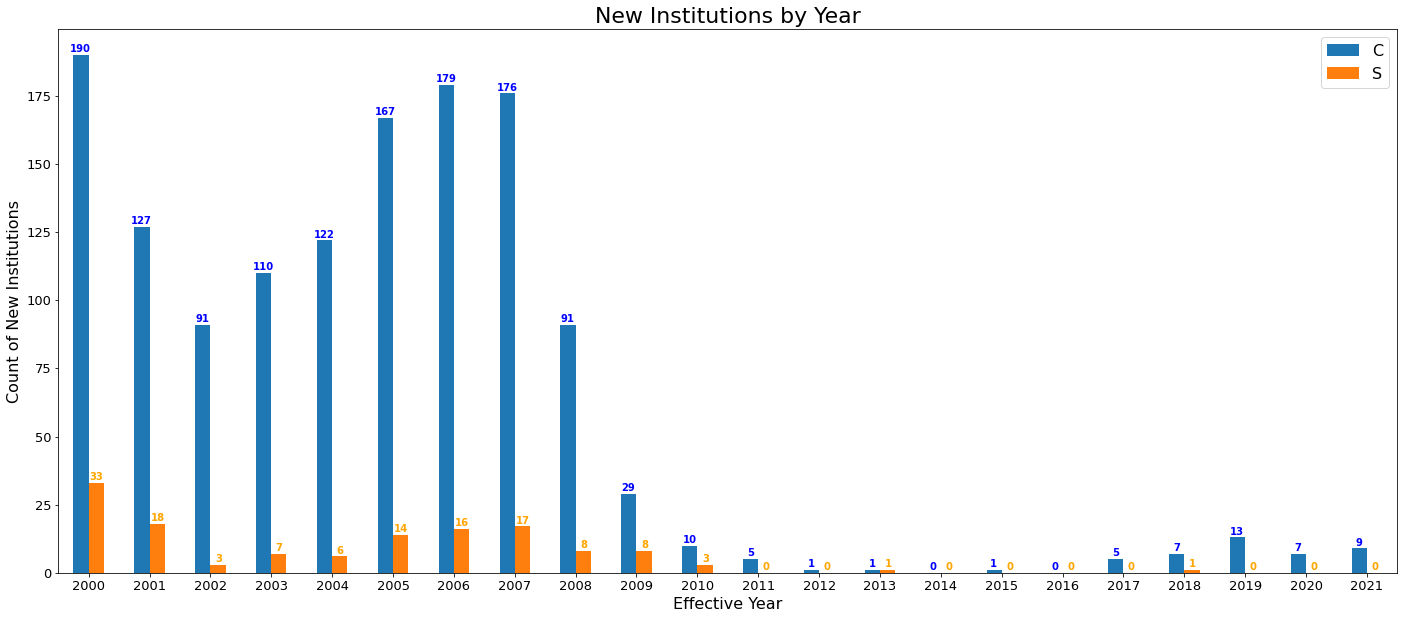

In [84]:


fig, axis = plt.subplots(figsize=(24, 10))

comb_new_by_year_reformat.plot(kind='bar', x='Effective Year', ax=axis)

axis.set_ylabel('Count of New Institutions', size=16)
axis.set_xlabel('Effective Year', size=16)
axis.set_title('New Institutions by Year', size=22)

axis.tick_params(axis='x', labelsize=13, labelrotation=0)
axis.tick_params(axis='y', labelsize=13)

axis.legend(fontsize=16)

for i, v in enumerate(comb_new_by_year_reformat['C']):
    axis.text(i-0.13, v+1, str(v), color='blue', fontweight='bold', horizontalalignment='center')
for i, v in enumerate(comb_new_by_year_reformat['S']):
    axis.text(i+0.13, v+1, str(v), color='orange', fontweight='bold', horizontalalignment='center')

fig.show()

In [57]:
x.groupby(["EFFYEAR", "CLASS_TYPE"]).count()

BANK_INSURED
EFFYEAR CLASS_TYPE              
2000    C                    190
        S                     33
2001    C                    127
        S                     18
2002    C                     91
        S                      3
2003    C                    110
        S                      7
2004    C                    122
        S                      6
2005    C                    167
        S                     14
2006    C                    179
        S                     16
2007    C                    176
        S                     17
2008    C                     91
        S                      8
2009    C                     29
        S                      8
2010    C                     10
        S                      3
2011    C                      5
2012    C                      1
2013    C                      1
        S                      1
2015    C                      1
2017    C                      5
2018    C                      7
        S                      1
2019    C                     13
2020    C                      7
2021    C                      9